# Problem
<blockquote>
Robot cars have a top speed (which they prefer to maintain at all times while driving) that’s a real number randomly drawn uniformly between 1 and 2 miles per minute. A two-lane highway for robot cars has a fast lane (with minimum speed a) and a slow lane (with maximum speed a). When a faster car overtakes a slower car in the same lane, the slower car is required to decelerate to either change lanes (if both cars start in the fast lane) or stop on the shoulder (if both cars start in the slow lane). Robot cars decelerate and accelerate at a constant rate of 1 mile per minute per minute, timed so the faster, overtaking car doesn’t have to change speed at all, and passing happens instantaneously. If cars rarely meet (so you never have to consider a car meeting more than one other car on its trip, see Mathematical clarification below), and you want to minimize the miles not driven due to passing, what should a be set to, in miles per minute? Give your answer to 10 decimal places.

Example car interactions: suppose a is set to 1.2 miles per minute. If a car with top speed 1.8 overtakes a car with top speed 1.1, neither has to slow down because they are in different lanes. If instead the car with top speed 1.8 overtakes one with top speed 1.7, the slower car computes the optimal time to start decelerating for 30 seconds (to reach 1.2 miles per minute to switch to the other lane) so the faster car instantly passes and the slower car can immediately start accelerating for another 30 seconds to return to 1.7 miles per minute. This pass cost 0.25 miles (how far behind where the slower car would be if it continued at 1.7 miles per minute).

If a car with top speed 1.1 overtakes one with top speed 1.0 in the slow lane, the slower (slowest!) car must decelerate for a full minute all the way to 0 to allow the pass, and then accelerate for a full minute to reestablish its speed, losing exactly 1 mile of distance.

Assume all car trips are of constant length N, starting at arbitrary points and times along an infinitely long highway. This is made more mathematically precise below.

Mathematical clarification: Say car trips arrive at a rate of z car trip beginnings per mile per minute, uniformly across the infinite highway (cars enter and exit their trips at their preferred speed due to on/off ramps), and car trips have a constant length of N miles. Define f(z,N) to be the value of a that minimizes the expected lost distance per car trip due to passing. Find:

the limit of [the limit of f(z,N) as z -> 0+] as N -> infinity.
</blockquote>

# Solution

Start with the following:

> Say car trips arrive at a rate of z car trip beginnings per mile per minute, uniformly across the infinite highway (cars enter and exit their trips at their preferred speed due to on/off ramps), and car trips have a constant length of N miles. Define f(z,N) to be the value of a that minimizes the expected lost distance per car trip due to passing. Find: the limit of [the limit of f(z,N) as z -> 0+] as N -> infinity.

To solve this, consider an interaction between two cars, 1 and 2. Assume car 1 starts at position $(x, t)=(0,0)$, and moves with a speed $v_1$. Assume that car 2 starts at position $(x, t) = (x_0, t_0)$ and moves at a speed $v_2$.

For fixed $v_1,v_2$, we want to consider the measure of the set of valid $(x_0, t_0)$ such that the cars will interact. This will give us our desired intensity rate.

Note that the cars intersect at a single point $(x', t')$. Because $x_1(t)=v_1t$, and $x_2(t)=v_2t$, setting $x_1(t)=x_2(t-t_0)$ yields the following equation:
$$ v_1t'=x_0 + v_2(t'-t_0)$$
Solving,
$$ t' = \frac{x_0-v_2t_0}{v_1-v_2}$$

However, we need both cars to be driving at time $t'$. Since car 1 drives a time $\frac{N}{v_1}$, and car 2 for $\frac{N}{v_2}$, we get the following requirements:

$$ t' \in [0, \frac{N}{v_1}]$$
$$ t' \in [t_0, t_0 + \frac{N}{v_2}]$$

These reduce to the set of inequalities:

$$ \max(0,t) < t' < \min(\frac{N}{v_1}, t_0 + \frac{N}{v_2})$$

i.e.

$$ \max(0,t) < \frac{x_0-v_2t_0}{v_1-v_2} < N \cdot \min(\frac{1}{v_1}, \frac{t_0}{N} + \frac{1}{v_2})$$

Then
$$ \max(0,\frac{t}{N}) < \frac{\frac{x_0}{N}-v_2\frac{t_0}{N}}{v_1-v_2} < \min(\frac{1}{v_1}, \frac{t_0}{N} + \frac{1}{v_2})$$
Call this criterion $(*)$

We wish to find the measure of the set $A_{v_1,v_2} = \{(x_0, t_0) \in \R |$ such that $(*)\}$. For simplicity call this set $A$. Note that $\mu(A) \propto PDF(v_1,v_2)$

To find $\mu(A)$, first perform the of variables: $\alpha = \frac{x_0}{N}, \beta = \frac{t_0}{N}$. Note that the Jacobian determinant is $1/N^2$ (since we shrank each coordinate by N). Then the above equation transforms to:

$$ \max(0, \beta) < \frac{\alpha - v_2 \cdot \beta}{v_1-v_2} < \min(\frac{1}{v_1}, \beta + \frac{1}{v_2})$$

We can further simplify this inequality with a second change of variables: $\beta=\beta$, $\gamma = \frac{\alpha - v_2\cdot\beta}{v_1-v_2}$. Note that $\alpha = \gamma(v_1-v_2) + \beta\cdot v_2$. Then our criterion $(*)$ transforms to the criterion $(\dagger)$:

$$ \max(0, \beta) < \gamma < \min(\frac{1}{v_1}, \beta + \frac{1}{v_2})$$


The Jacobian determinant of this change of variables is:

$$\left| \begin{matrix} \frac{\partial\alpha}{\partial\gamma} & \frac{\partial\alpha}{\partial\beta} \\ \frac{\partial\beta}{\partial\gamma} & \frac{\partial\beta}{\partial\beta} \end{matrix} \right| = \left| \begin{matrix} {v_1-v_2} & {v_2} \\ {0} & {1} \end{matrix} \right| = {v_2-v_1}$$

Call $A'_{v_1,v_2}$ the set defined such that $(\dagger)$ holds true for $(\beta, \gamma)$. For simplicity refer to this as just $A'$.

We wish to find $\mu(A) = N^2\cdot|v_1-v_2|\cdot\mu(A')$. It remains to find $\mu(A')$. We can do this with simple geometry.

The set $A'$ is defined by the following set of inequalities:
|                                   |        |
|-----------------------------------|--------|
| $\gamma > 0$                      | (i)    |
| $\gamma < \frac{1}{v_1}$          | (ii)   |
| $\gamma > \beta$                  | (iii)  |
| $\gamma > \beta + \frac{1}{v_2}$  | (iv)   |
|                                   |        |


Lines $(i)$ and $(ii)$ are parallel, while $(iii)$ and $(iv)$ are also parallel. Thus, the set $A'$ is a parallelogram. The width of $A'$ is $\frac{1}{v_2}$, since line $(iv)$ intersects $(i)$ at $(-\frac{1}{v_2}, 0)$. The height of $A'$ is $\frac{1}{v_1}$, since this is the gap between lines $(i)$ and $(ii)$. Thus, $\mu(A') = \frac{1}{v_1v_2}$. Thus, $\mu(A) = \frac{N^2\cdot|v_1-v_2|}{v_1v_2}$

This implies that $PDF(v_1, v_2) \propto \frac{|v_1-v_2|}{v_1v_2}$

# Step 2: Analyzing the cost function

> Robot cars have a top speed (which they prefer to maintain at all times while driving) that’s a real number randomly drawn uniformly between 1 and 2 miles per minute. A two-lane highway for robot cars has a fast lane (with minimum speed a) and a slow lane (with maximum speed a). When a faster car overtakes a slower car in the same lane, the slower car is required to decelerate to either change lanes (if both cars start in the fast lane) or stop on the shoulder (if both cars start in the slow lane). Robot cars decelerate and accelerate at a constant rate of 1 mile per minute per minute, timed so the faster, overtaking car doesn’t have to change speed at all, and passing happens instantaneously. If cars rarely meet (so you never have to consider a car meeting more than one other car on its trip, see Mathematical clarification below), and you want to minimize the miles not driven due to passing, what should a be set to, in miles per minute?


Let $f$ be the speed of the faster car, and $s$ the speed of the slower car. By nature, if they are interacting, the faster car is behind the slower car. Then we can use the following PDF from above:
$$PDF(f,s)=\frac{f-s}{fs}$$

Note that the PDF need not be normalized, since we're looking to minimize the function.

We also need to consider the cost function. Assume we have set a speed limit $a$. There are 3 cases:
- Case 1: $f > s > a$: then the slow car must slow down to a speed a, then back up to the speed s. Since the acceleration is cosntant, we can consider the mileage lost as the area under the velocity-time graph, which shows a depressed triangle. Since the acceleration is 1 mi/min, this interaction takes $2*(s-a)$ seconds (width of triangle), while the total speed lost is $(s-a)$. Then the total mileage lost is $(s-a)^2$ miles.
- Case 2: $f \geq a \geq s$: then neither car slows down, so no miles are lost.
- Case 3: $a > f > s$: then the slow car must slow down to a speed 0, then back to a speed of s. By the same process as case 1, this costs $s^2$ miles.

Simplifying, we have the following piecewise definition:

$$
C(f,s) = 
\begin{cases}
(s-a)^2 & \text{if } f > s > a \\
0 & \text{if } f \geq a \geq s \\
s^2 & \text{if } a > f > s
\end{cases}
$$

Then, we can construct an expected value function $$E(a) = \int_{1}^{2} \int_{1}^{2} C(f,s) PDF(f,s) \, ds \, df$$

Splitting the integral piecewise, we have:
$$\begin{aligned}
E(a) = & \int_{a}^{2} \int_{a}^{f} (s-a)^2 \, (\frac{f-s}{fs}) \, ds \, df \\
      & + \int_{a}^{2} \int_{1}^{a} 0 \, (\frac{f-s}{fs}) \, ds \, df \\
      & + \int_{1}^{a} \int_{1}^{f} s^2 \, (\frac{f-s}{fs}) \, ds \, df \\
\end{aligned}$$

$$
E(a) = \int_{a}^{2} \int_{a}^{f} (s-a)^2 \, (\frac{f-s}{fs}) \, ds \, df + \int_{1}^{a} \int_{1}^{f} s^2 \, (\frac{f-s}{fs}) \, ds \, df

Symbolic E(a) = -a**3*log(a)/3 + a**3*log(2)/3 + a**3 - 2*a**2*log(a) - a**2 + 2*a**2*log(2) - 5*a/2 + log(a)/3 + 8/9

Derivative E'(a) = (a*(-6*a**2*log(a) + a**2*log(64) + 16*a**2 - 24*a*log(a) - 24*a + a*log(16777216) - 15) + 2)/(6*a)
Second Derivative E''(a) = (a**2*(-6*a*log(a) + a*log(64) + 13*a - 12*log(a) - 24 + log(4096)) - 1)/(3*a**2)

Critical Points and Evaluation:
Critical point a = 1.177141416815506:
  E(a) = 0.003015586417843
  E''(a) = 0.228526999884648 (local minimum)

Endpoint Evaluation:
Endpoint a = 1.0:
  E(a) = 0.006232310195428
Endpoint a = 2.0:
  E(a) = 0.119937949075537

Numerical vs Symbolic Results:

a = 1.2:
  Numerical E(a) = 0.0030760969
  Symbolic E(a) = 0.0030760969
  Difference = 5.0914134020e-16

a = 1.5:
  Numerical E(a) = 0.0172555825
  Symbolic E(a) = 0.0172555825
  Difference = 5.5858095926e-16

a = 1.8:
  Numerical E(a) = 0.0643747611
  Symbolic E(a) = 0.0643747611
  Difference = 9.1593399532e-16


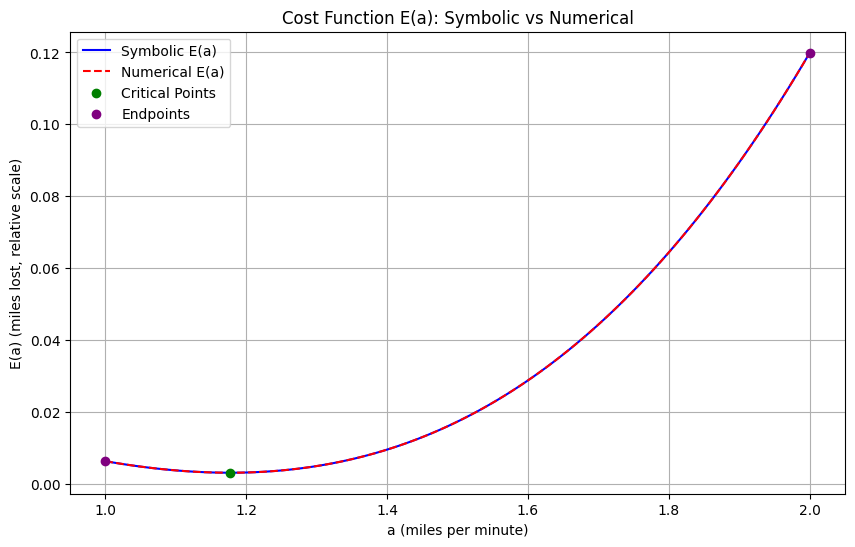

In [18]:
from sympy import symbols, integrate, simplify, lambdify, diff
import numpy as np
from scipy import integrate as scipy_integrate
import matplotlib.pyplot as plt

# Define symbolic variables
a, s, f = symbols('a s f')

# Define the first integrand: (s - a)^2 * (f - s) / (f * s)
integrand1 = (s - a)**2 * (f - s) / (f * s)

# Compute the first double integral: integrate from s=a to f, f=a to 2
inner_integral1 = integrate(integrand1, (s, a, f))
outer_integral1 = integrate(inner_integral1, (f, a, 2))

# Define the second integrand: s^2 * (f - s) / (f * s)
integrand2 = s**2 * (f - s) / (f * s)

# Compute the second double integral: integrate from s=1 to f, f=1 to a
inner_integral2 = integrate(integrand2, (s, 1, f))
outer_integral2 = integrate(inner_integral2, (f, 1, a))

# Sum the two results
E = outer_integral1 + outer_integral2

# Simplify the final expression
result = simplify(E)

# Print the symbolic result
print("Symbolic E(a) =", result)

# Compute the first derivative E'(a)
E_prime = diff(result, a)
print("\nDerivative E'(a) =", simplify(E_prime))

# Compute the second derivative E''(a)
E_double_prime = diff(E_prime, a)
print("Second Derivative E''(a) =", simplify(E_double_prime))

# Convert symbolic expressions to numerical functions
E_func = lambdify(a, result, modules='numpy')
E_prime_func = lambdify(a, E_prime, modules='numpy')
E_double_prime_func = lambdify(a, E_double_prime, modules='numpy')

# Newton's method to find critical points
def newton_method(f, f_prime, x0, tol=1e-15, max_iter=100):
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        fpx = f_prime(x)
        if abs(fpx) < 1e-10:  # Avoid division by near-zero
            return None
        dx = fx / fpx
        x = x - dx
        if abs(dx) < tol:
            return x
    return None

# Initial guesses in (1, 2)
initial_guesses = [1.1, 1.3, 1.5, 1.7, 1.9]
critical_points = []

# Find critical points using Newton's method
for x0 in initial_guesses:
    root = newton_method(E_prime_func, E_double_prime_func, x0)
    if root is not None and 1 < root < 2:
        # Round to 15 decimal places and check for duplicates
        root = round(root, 15)
        if not any(abs(root - cp) < 1e-10 for cp in critical_points):
            critical_points.append(root)

# Evaluate E(a) at critical points and classify them
print("\nCritical Points and Evaluation:")
for cp in critical_points:
    E_value = E_func(cp)
    E_double_prime_value = E_double_prime_func(cp)
    nature = (
        "local minimum" if E_double_prime_value > 0 else
        "local maximum" if E_double_prime_value < 0 else
        "requires further analysis (E'' = 0)"
    )
    print(f"Critical point a = {cp:.15f}:")
    print(f"  E(a) = {E_value:.15f}")
    print(f"  E''(a) = {E_double_prime_value:.15f} ({nature})")

# Evaluate E(a) at endpoints a = 1 and a = 2
print("\nEndpoint Evaluation:")
endpoints = [1.0, 2.0]
for ep in endpoints:
    E_value = E_func(ep)
    print(f"Endpoint a = {ep:.1f}:")
    print(f"  E(a) = {E_value:.15f}")

# Define numerical integrands for scipy
def integrand1_num(s, f, a_val):
    return (s - a_val)**2 * (f - s) / (f * s)

def integrand2_num(s, f, a_val):
    return s**2 * (f - s) / (f * s)

# Values of a to evaluate for numerical vs symbolic comparison
a_values = [1.2, 1.5, 1.8]

# Compute numerical integrals and compare
print("\nNumerical vs Symbolic Results:")
for a_val in a_values:
    # First double integral: s from a to f, f from a to 2
    integral1_num = scipy_integrate.dblquad(
        lambda s, f: integrand1_num(s, f, a_val),
        a_val, 2,  # f limits
        lambda f: a_val, lambda f: f  # s limits
    )[0]
    
    # Second double integral: s from 1 to f, f from 1 to a
    integral2_num = scipy_integrate.dblquad(
        lambda s, f: integrand2_num(s, f, a_val),
        1, a_val,  # f limits
        lambda f: 1, lambda f: f  # s limits
    )[0]
    
    # Sum of numerical integrals
    E_num = integral1_num + integral2_num
    
    # Symbolic result evaluated at a_val
    E_sym = E_func(a_val)
    
    # Print comparison
    print(f"\na = {a_val}:")
    print(f"  Numerical E(a) = {E_num:.10f}")
    print(f"  Symbolic E(a) = {E_sym:.10f}")
    print(f"  Difference = {abs(E_num - E_sym):.10e}")

# Compute E(a) for plotting (numerical and symbolic)
a_plot = np.linspace(1, 2, 100)
E_symbolic = E_func(a_plot)
E_numerical = []

# Numerical integration for plotting
for a_val in a_plot:
    integral1_num = scipy_integrate.dblquad(
        lambda s, f: integrand1_num(s, f, a_val),
        a_val, 2,
        lambda f: a_val, lambda f: f
    )[0]
    integral2_num = scipy_integrate.dblquad(
        lambda s, f: integrand2_num(s, f, a_val),
        1, a_val,
        lambda f: 1, lambda f: f
    )[0]
    E_numerical.append(integral1_num + integral2_num)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(a_plot, E_symbolic, label='Symbolic E(a)', color='blue')
plt.plot(a_plot, E_numerical, label='Numerical E(a)', color='red', linestyle='--')
plt.scatter(critical_points, [E_func(cp) for cp in critical_points], color='green', label='Critical Points', zorder=5)
plt.scatter(endpoints, [E_func(ep) for ep in endpoints], color='purple', label='Endpoints', zorder=5)
plt.xlabel('a (miles per minute)')
plt.ylabel('E(a) (miles lost, relative scale)')
plt.title('Cost Function E(a): Symbolic vs Numerical')
plt.legend()
plt.grid(True)
plt.show()